In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/allstate-claims-severity/test.csv.zip
/kaggle/input/allstate-claims-severity/sample_submission.csv
/kaggle/input/allstate-claims-severity/test.csv
/kaggle/input/allstate-claims-severity/train.csv.zip
/kaggle/input/allstate-claims-severity/train.csv
/kaggle/input/allstate-claims-severity/sample_submission.csv.zip


In [2]:
import pandas as pd
sample_submission = pd.read_csv("../input/allstate-claims-severity/sample_submission.csv")
test_data = pd.read_csv("../input/allstate-claims-severity/test.csv")
train_data = pd.read_csv("../input/allstate-claims-severity/train.csv")

In [3]:
print("Train data dimensions: ", train_data.shape)
print("Test data dimensions: ", test_data.shape)

Train data dimensions:  (188318, 132)
Test data dimensions:  (125546, 131)


In [4]:
#Exploring the train_data
train_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [5]:
print('Number of missing values', train_data.isnull().sum().sum())

Number of missing values 0


In [6]:
#Exploring the data stastically 
train_data.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [7]:
#Exploring the columns of data
train_data.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

In [8]:
test_data.columns

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11',
       'cont12', 'cont13', 'cont14'],
      dtype='object', length=131)

By seeing both Train Data and Test Data there are 132 columns in train data and 131 column in test data. 'Loss' column is missing in test data indicating that it is the **target**.

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [10]:
# Counting the Feature of train_data
cont_Featureslist = []
for colName,x in train_data.iloc[1,:].iteritems():
    #print(x)
    if(not str(x).isalpha()):
        cont_Featureslist.append(colName)

In [11]:
print(cont_Featureslist)

['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss']


In [12]:
cont_Featureslist.remove('id')

**Plotting Corelation between countinues features and target **

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

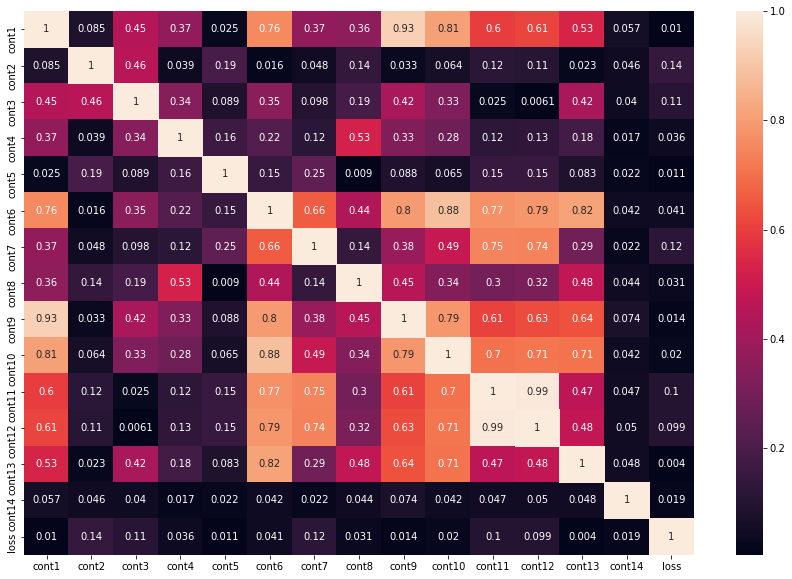

In [14]:
# To find correlation between features and target feature
correlationMatrix = train_data[cont_Featureslist].corr().abs()

plt.subplots(figsize=(15, 10))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

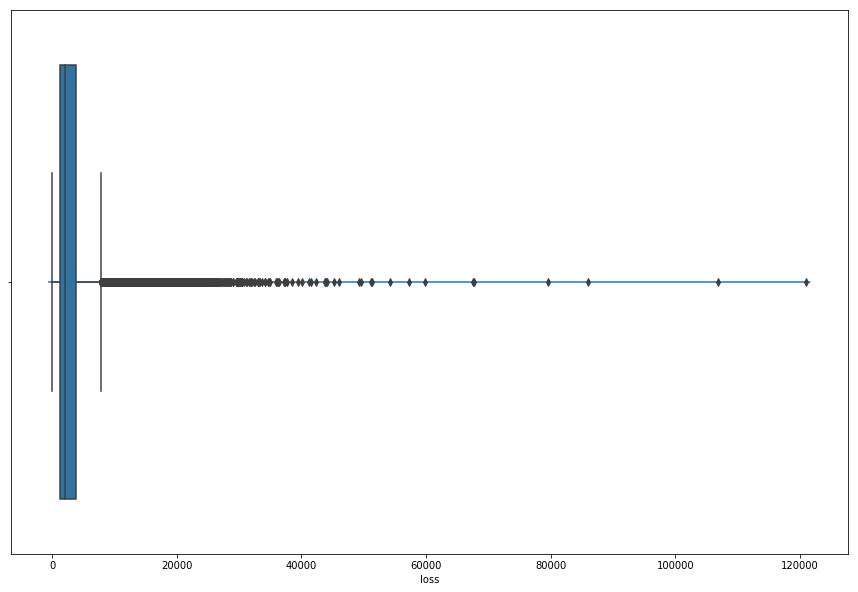

In [15]:
plt.figure(figsize=(15,10))
sns.distplot(train_data["loss"])
sns.boxplot(train_data["loss"])

Here, we can see loss is highly right skewed data. This happened because there are many outliers in the data. Lets apply log to see if we can get normal distribution. 

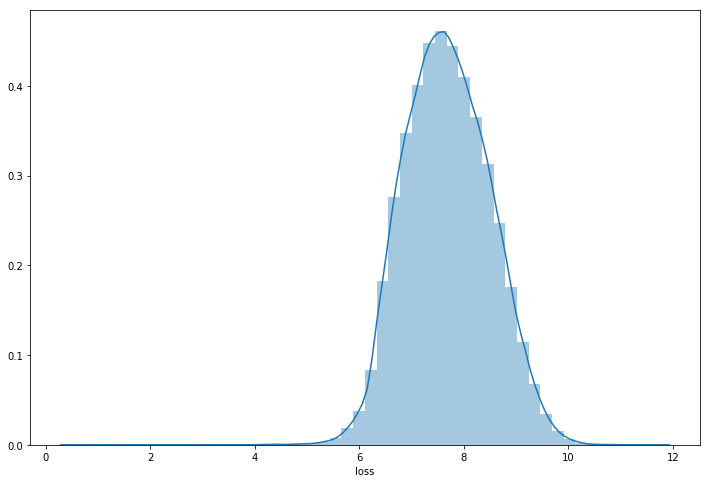

In [16]:
plt.figure(figsize=(12,8))
sns.distplot(np.log1p(train_data["loss"]))

So we got normal distribution by applying logarithm on loss function.

Finally we got normal distribution, so we can train model using target feature as log of loss. So there is no need to remove outliers.

In [17]:
catCount = sum(str(x).isalpha() for x in train_data.iloc[1,:])
print("Number of categories: ",catCount)

Number of categories:  116


There are 116 categories with non alphanumeric values, most of the machine learning algorithms doesn't work with alpha numeric values. So, lets convert it into numeric values.

In [18]:
cat_Featureslist = []
for colName,x in train_data.iloc[1,:].iteritems():
    if(str(x).isalpha()):
        cat_Featureslist.append(colName)

In [19]:
print(train_data[cat_Featureslist].apply(pd.Series.nunique))

cat1        2
cat2        2
cat3        2
cat4        2
cat5        2
         ... 
cat112     51
cat113     61
cat114     19
cat115     23
cat116    326
Length: 116, dtype: int64


Conver categorical string values to numeric values

In [20]:
from sklearn.preprocessing import LabelEncoder
for cf1 in cat_Featureslist:
    le = LabelEncoder()
    le.fit(train_data[cf1].unique())
    train_data[cf1] = le.transform(train_data[cf1])

In [21]:
train_data.head(5)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,0,1,0,1,0,0,0,0,1,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,0,1,0,0,0,0,0,0,1,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,0,1,0,0,1,0,0,0,1,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,1,1,0,1,0,0,0,0,1,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,0,1,0,1,0,0,0,0,1,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


**Making Prediction by training model**

In [22]:
featureslist = []
for colName,x in train_data.iloc[1,:].iteritems():
    #print(x)
    if(not str(x).isalpha() or str(x).isalpha):
        featureslist.append(colName)

In [23]:
featureslist.remove('id')

**Finding Root mean squred error for DecisionTreeRegressor**

In [24]:
# Import nessery models
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split

X = train_data[featureslist]
y = train_data.loss

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)
y_pred = dtr_model.predict(X_test)
val_mae = mean_absolute_error(y_pred, y_test)
mse_test = MSE(y_test, y_pred)
rmse_test = mse_test**(1/2)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

Validation MAE when not specifying max_leaf_nodes: 2
Test set RMSE of sgbr: 122.531


After checking the model with DecisionTreeRegressor model we get mean absolute error as "2" and RMSE as "122.531" which is greater than LinearRegression Model.

**Chicking the Root mean squared error for RandomForestRegressor method**

In [25]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
val_mae = mean_absolute_error(y_pred, y_test)
mse_test = MSE(y_test, y_pred)
rmse_test = mse_test**(1/2)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Validation MAE when not specifying max_leaf_nodes: 1
Test set RMSE of sgbr: 64.548


For RandomForestRegeressor model we got RMSE as "64.548".